In [0]:
!pip install wget

In [0]:
# dataturks, label, Indian_Number_plates.json
from google.colab import files
files.upload()

In [0]:
!mkdir data
%cd data
!mkdir train
!mkdir test
!ls
%cd ..
!python dataturks_to_PascalVOC.py Indian_Number_plates.json './data/train' './data/train'

In [0]:
import os
print(len(os.listdir('./data/train')))
#300 images and 300 voc files

In [0]:
import os, shutil
path = "./data/train/"
moveto = "./data/test/"
files = os.listdir(path)
files.sort()
for i,f in enumerate(files):
    if i>499:
      src = path+f
      dst = moveto
      shutil.move(src,dst)

In [0]:
print(len(os.listdir('./data/test')))

In [0]:
!mkdir /content/data/train/images
!mkdir /content/data/train/annotations
import os, shutil
path = "/content/data/train/"
files = os.listdir(path)
files.sort()
length = len(files)
i = 0
while(i<length):
    f = files[i]
    if f == 'annotations' or f == 'images':
      i = i+1
      continue
    elif f[-4:] == 'jpeg' or f[-3:] == 'jpg':
      moveto = "/content/data/train/images/"
      src = path+f
      dst = moveto
      shutil.move(src,dst)
      
      i = i+1
      
      f = files[i]
      moveto = "/content/data/train/annotations/"
      src = path+f
      dst = moveto
      shutil.move(src,dst)
    else:
      os.remove('/content/data/train/' + f)
      i = i+1
      f = files[i]
      os.remove('/content/data/train/' + f)
    i = i+1

In [0]:
#len(os.listdir('/content/data/train/annotations/'))
len(os.listdir('/content/data/train/images/'))

In [0]:
!mkdir /content/data/test/images
!mkdir /content/data/test/annotations
import os, shutil
path = "/content/data/test/"
files = os.listdir(path)
files.sort()
length = len(files)
i = 0
while(i<length):
    f = files[i]
    if f == 'annotations' or f == 'images':
      i = i+1
      continue
    elif f[-4:] == 'jpeg' or f[-3:] == 'jpg':
      moveto = "/content/data/test/images/"
      src = path+f
      dst = moveto
      shutil.move(src,dst)
      
      i = i+1
      
      f = files[i]
      moveto = "/content/data/test/annotations/"
      src = path+f
      dst = moveto
      shutil.move(src,dst)
    else:
      os.remove('/content/data/test/' + f)
      i = i+1
      f = files[i]
      os.remove('/content/data/test/' + f)
    i = i+1

In [0]:
'''import os
import PIL,cv2
from PIL import Image
lisdir = sorted(os.listdir('./data/train/images'))

for lis in lisdir:
  img = Image.open(os.path.join('./data/train/images',lis))
  os.remove(os.path.join('./data/train/images',lis))
  img = img.resize((300, 300), PIL.Image.ANTIALIAS)
  img.save(os.path.join('./data/train/images',lis))
import os
import PIL,cv2
from PIL import Image
lisdir = sorted(os.listdir('./data/test/images'))

for lis in lisdir:
  img = Image.open(os.path.join('./data/test/images',lis))
  os.remove(os.path.join('./data/test/images',lis))
  img = img.resize((300, 300), PIL.Image.ANTIALIAS)
  img.save(os.path.join('./data/test/images',lis))'''

In [0]:
len(os.listdir('/content/data/test/annotations/'))
#len(os.listdir('/content/data/test/images/'))

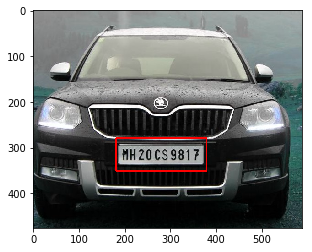

In [0]:
import cv2
img = cv2.imread('/content/data/train/images/03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg')
from matplotlib import pyplot as plt
plt.imshow(cv2.rectangle(img,(181,279),(379,351),(255,0,0),2))

In [0]:
#XML to CSV
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
       
        tree = ET.parse(xml_file)
        root = tree.getroot()

        filename = root.find('filename').text
        width = int(root[4].find('width').text)/5
        height = int(root[4].find('height').text)/5
        class_ = 'plate'
        xmin = int(root[6].find('bndbox').find('xmin').text)/5
        ymin = int(root[6].find('bndbox').find('ymin').text)/5
        xmax = int(root[6].find('bndbox').find('xmax').text)/5
        ymax = int(root[6].find('bndbox').find('ymax').text)/5

        xml_list.append([filename,width,height,class_,xmin,ymin,xmax,ymax])
        
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df



image_path = '/content/data/train/annotations'
xml_df = xml_to_csv(image_path)
xml_df.to_csv('/content/train_labels.csv', index=None)

image_path = '/content/data/test/annotations'
xml_df = xml_to_csv(image_path)
xml_df.to_csv('/content/test_labels.csv', index=None)


In [0]:
!git clone https://github.com/tensorflow/models

In [0]:
#upload generate_tfrecord 
from google.colab import files
files.upload()

In [0]:
!mv generate_tfrecord.py ./models/research
%cd ./models/research/

In [0]:
!python generate_tfrecord.py --csv_input=/content/train_labels.csv --output_path=/content/train.record --image_dir=/content/data/train/images
!python generate_tfrecord.py --csv_input=/content/test_labels.csv --output_path=/content/test.record --image_dir=/content/data/test/images

In [0]:
%cd /content/models/research/object_detection
!mkdir training
%cd training

In [0]:
#download config file from object detection and samples

In [0]:
import wget
url = 'http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz'
filename = wget.download(url)

import tarfile
tar = tarfile.open('ssd_mobilenet_v1_coco_2018_01_28.tar.gz', "r:gz")
tar.extractall()
tar.close()

In [0]:
#Upload the config file
files.upload()

In [0]:
%cd /content/models/research/object_detection/legacy
!cp train.py /content/models/research/
%cd /content/models/research/object_detection/protos

In [0]:
#upload protoc files
files.upload()

In [0]:
%cd /content/models/research
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

In [0]:
!python /content/models/research/object_detection/builders/model_builder_test.py

In [0]:
!cp ./object_detection/model_main.py ./

In [0]:
!python model_main.py --logtostderr --train_dir=/content/models/research/object_detection/training --pipeline_config_path=/content/models/research/object_detection/training/ssd_inception_v2_coco.config

In [0]:
!python train.py --logtostderr --train_dir=/content/models/research/object_detection/training --pipeline_config_path=/content/models/research/object_detection/training/ssd_mobilenet_v1_coco.config

In [0]:
%cd /content/models/research/object_detection

In [0]:
!python export_inference_graph.py --input_type image_tensor \
--pipeline_config_path /content/models/research/object_detection/training/ssd_mobilenet_v1_coco.config \
--trained_checkpoint_prefix /content/models/research/object_detection/training/model.ckpt-358 \
--output_directory /content/exported_model